In [8]:
import pandas as pd
from transformers import pipeline
d1= pd.read_csv('dataset1.csv', encoding = 'ISO-8859-1')

d1


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d2= pd.read_csv('dataset2.csv', encoding = 'ISO-8859-1')
d2


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [10]:
d3= pd.read_csv('dataset3.csv', encoding = 'ISO-8859-1',header=None, index_col=[0])
d3 = d3[[2,3]].reset_index(drop=True)
d3.columns = ['sentiment', 'text']
d3['sentiment'] = d3['sentiment'].str.lower()
d3


,sentiment,text
0,positive,im getting on borderlands and i will murder yo...
1,positive,I am coming to the borders and I will kill you...
2,positive,im getting on borderlands and i will kill you ...
3,positive,im coming on borderlands and i will murder you...
4,positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,irrelevant,â­ï¸ Toronto is the arts and culture capital...
75678,irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,positive,Today sucked so itâs time to drink wine n pl...
75680,positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
d1_filtered = d1[['text', 'sentiment']]
d2_filtered = d2[['text', 'sentiment']]
d4 = pd.concat([d1_filtered, d2_filtered, d3], ignore_index=True)
d4

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
107973,â­ï¸ Toronto is the arts and culture capital...,irrelevant
107974,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,irrelevant
107975,Today sucked so itâs time to drink wine n pl...,positive
107976,Bought a fraction of Microsoft today. Small wins.,positive


In [12]:
d4['sentiment'].value_counts()


sentiment
negative      31590
neutral       31151
positive      30794
irrelevant    13162
Name: count, dtype: int64

In [13]:
df = d4[d4['sentiment'] != 'irrelevant']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94816 entries, 0 to 107977
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       92963 non-null  object
 1   sentiment  93535 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [15]:
df.isnull().sum()

text         1853
sentiment    1281
dtype: int64

In [16]:
df.dropna(inplace=True)

C:\Users\palli\AppData\Local\Temp\ipykernel_19760\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [17]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [18]:
df.duplicated().sum()

4071

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape


(88892, 2)

In [21]:
df['text'].apply(len)

0          49
1         103
2          78
3          12
4          39
         ... 
107962    247
107963    173
107966    128
107967    171
107969    199
Name: text, Length: 88892, dtype: int64

In [22]:
df['text'].apply(len).value_counts()


text
47     714
45     711
53     702
36     699
44     696
      ... 
619      1
393      1
727      1
559      1
381      1
Name: count, Length: 403, dtype: int64

In [23]:
df = df[df['text'].apply(len)>1]

In [24]:
df.shape

(88866, 2)

In [25]:
df['sentiment'].value_counts()

sentiment
negative    30102
neutral     29817
positive    28947
Name: count, dtype: int64

In [26]:
import re

In [27]:
import nltk
nltk.download('stopwords') # Download the stopwords dataset
from nltk.corpus import stopwords# Import stopwords after downloading
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def word_count(x):
    return len(x.split())

def char_count(x):
    pattern = r'\s'
    return len(re.sub(pattern, '', x))

def avg_word_len(x):
    return char_count(x)/word_count(x)

def stop_words_count(x):
    temp = len([word for word in x.lower().split() if word in stop_words])
    return temp

def hashtags_count(x):
    return len(re.findall(r'#\w+', x))

def mentions_count(x):
    return len(re.findall(r'@\w+', x))

def numerics_count(x):
    return len(re.findall(r'\b\d+\b', x))

def upper_case_count(x):
    return len([word for word in x.split() if word.isupper()])


In [29]:
df['word_count'] = df['text'].apply(word_count)
df['char_count'] = df['text'].apply(char_count)
df['avg_word_len'] = df['text'].apply(avg_word_len)
df['stop_words_count'] = df['text'].apply(stop_words_count)
df['hashtags_count'] = df['text'].apply(hashtags_count)
df['mentions_count'] = df['text'].apply(mentions_count)
df['numerics_count'] = df['text'].apply(numerics_count)
df['upper_case_count'] = df['text'].apply(upper_case_count)
df


,text,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtags_count,mentions_count,numerics_count,upper_case_count
0,Last session of the day http://twitpic.com/67ezh,neutral,6,43,7.166667,2,0,0,0,0
1,Shanghai is also really exciting (precisely -...,positive,15,86,5.733333,2,0,0,0,2
2,"Recession hit Veronique Branquinho, she has to...",negative,13,66,5.076923,6,0,0,0,0
3,happy bday!,positive,2,10,5.000000,0,0,0,0,0
4,http://twitpic.com/4w75p - I like it!!,positive,5,34,6.800000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
107962,I have noticed streamers I watch who are now p...,negative,44,201,4.568182,22,1,0,0,4
107963,@6th__man playing red dead redemption-\n\nâO...,neutral,28,141,5.035714,6,0,1,0,0
107966,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...,neutral,23,105,4.565217,2,0,0,3,0
107967,Thank you to Matching funds Home Depot RW paym...,positive,21,151,7.190476,6,2,0,1,1


In [30]:
df.shape

(88866, 10)

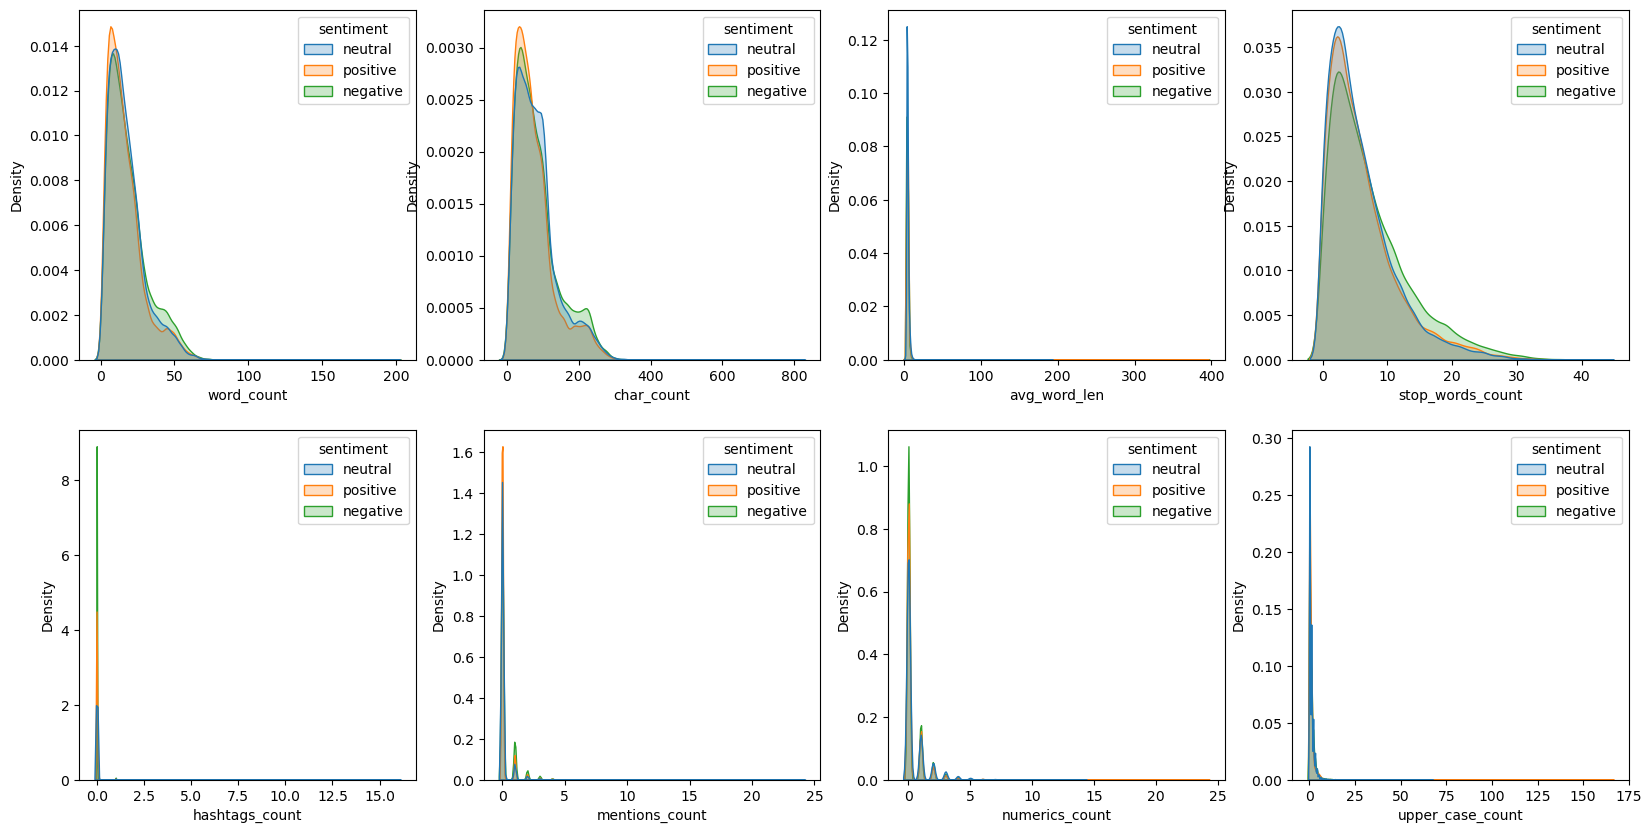

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

In [32]:
!pipinstall wordcloud

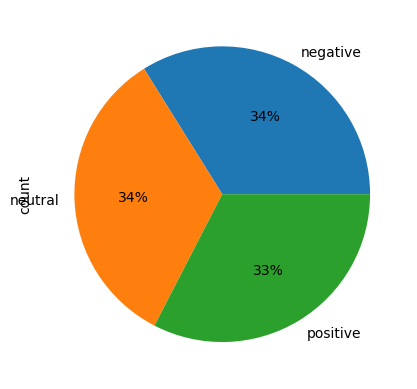

In [33]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud # type: ignore



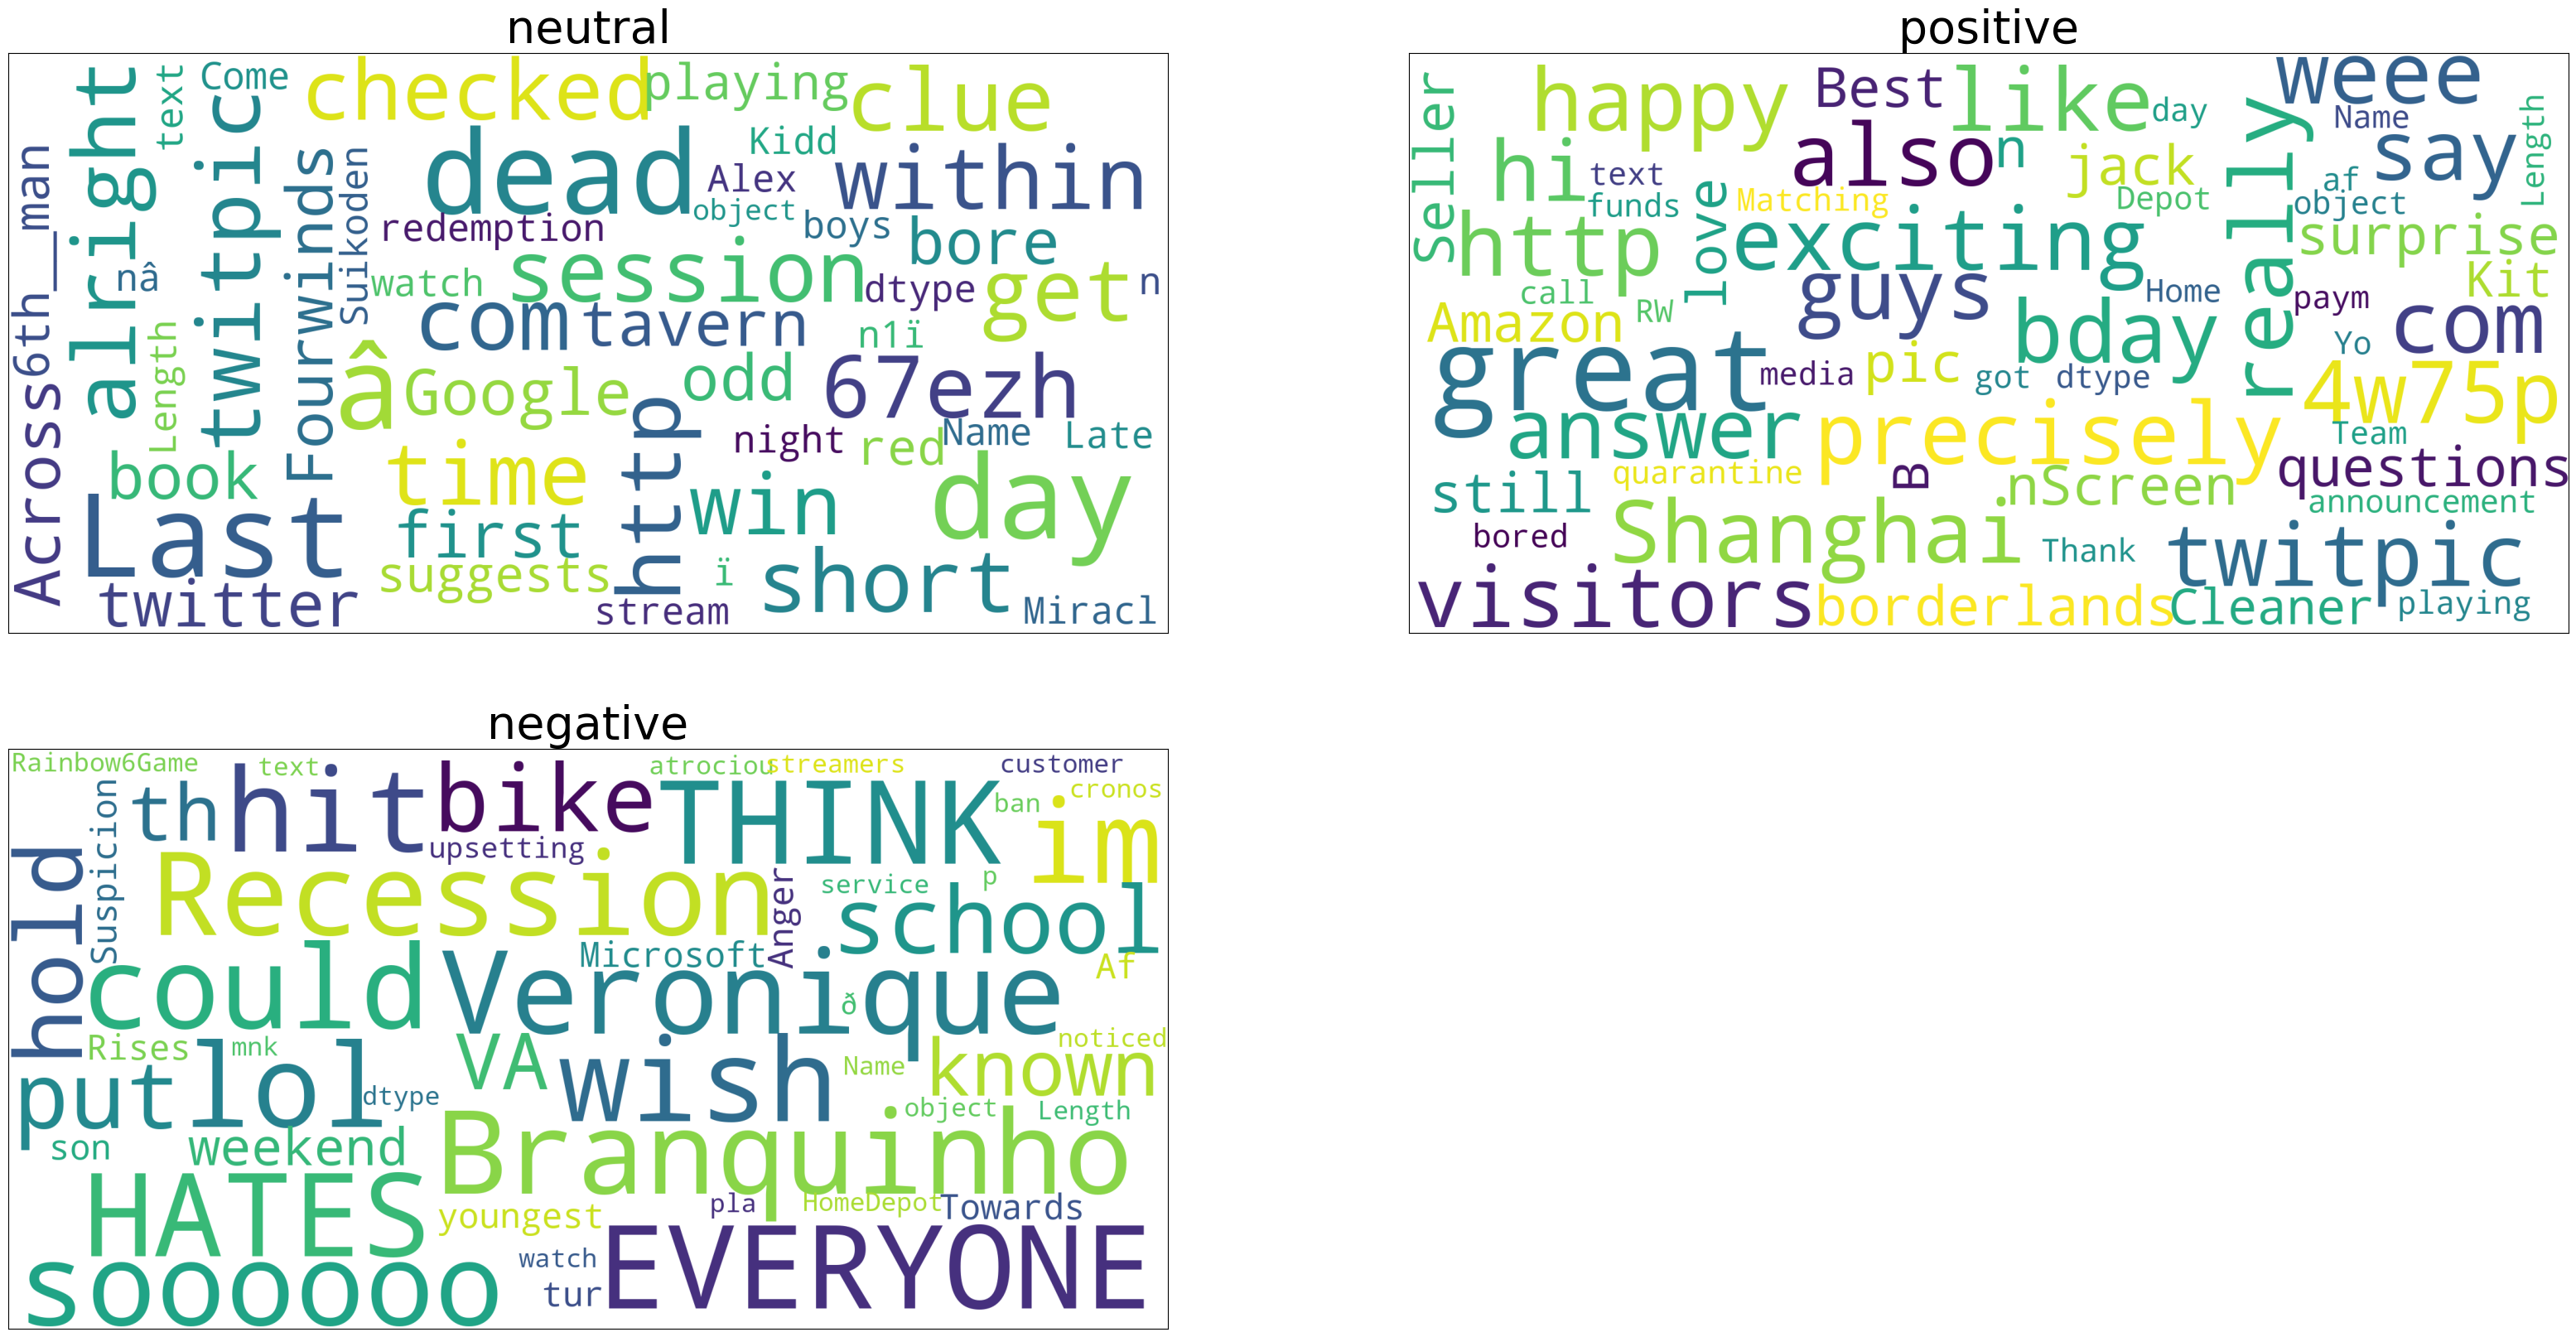

<Figure size 640x480 with 0 Axes>

In [34]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()


In [35]:
import string 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\palli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\palli\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [36]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


In [37]:
# Function to convert POS tag to WordNet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun


In [38]:
# Perform cleaning and preprocessing on the 'text' column
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove newlines
    text = re.sub(r'\n', '', text)
    # Remove alphanumeric words (words containing digits)
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove remaining non-alphabetic characters (except spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Normalize repeated characters (e.g.,  "soooo" -> "so")
    text = re.sub(r'(.)\1+', r'\1\1', text)
  
    tokens = nltk.word_tokenize(text)

# Get POS tags
    pos_tags = nltk.pos_tag(tokens)

# Lemmatize with POS
    lemmatized_words = [
    lemmatizer.lemmatize(token, get_wordnet_pos(pos)) 
    for token, pos in pos_tags 
    if token.lower() not in stop_words
    ]
    # Join words back into a single string
    text = ' '.join(lemmatized_words)
    
    return text

df['text'] = df['text'].astype(str)

# Apply the clean_text function and assign it back to the DataFrame
df['text'] = df['text'].apply(clean_text)

# Print the cleaned DataFrame
df



,text,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtags_count,mentions_count,numerics_count,upper_case_count
0,last session day,neutral,6,43,7.166667,2,0,0,0,0
1,shanghai also really excite precisely skyscrap...,positive,15,86,5.733333,2,0,0,0,2
2,recession hit veronique branquinho quit compan...,negative,13,66,5.076923,6,0,0,0,0
3,happy bday,positive,2,10,5.000000,0,0,0,0,0
4,like,positive,5,34,6.800000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
107962,notice streamer watch play game battlefield v ...,negative,44,201,4.568182,22,1,0,0,4
107963,play red dead redemptionoh shit bear start run...,neutral,28,141,5.035714,6,0,1,0,0
107966,suikoden alex kidd miracle world persona soul ...,neutral,23,105,4.565217,2,0,0,3,0
107967,thank match fund home depot rw payment generou...,positive,21,151,7.190476,6,2,0,1,1


In [39]:
df.shape

(88866, 10)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

In [41]:
df.shape, X_train.shape, X_test.shape

((88866, 10), (71092,), (17774,))

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
XV_train = vectorizer.fit_transform(X_train)
XV_test = vectorizer.transform(X_test)

In [ ]:
# We are going to use:

# Logistic Regression
# Naive Bayes
# Decision Tree Model
# Random Forest Model
# XGBoost Model

In [44]:
from sklearn import metrics

In [45]:
# Analyze the results
def analyze_results(y_test,y_pred):
    # Get the metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision =  metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
    print("Accuracy:", "%.6f" % accuracy)
    print("Precision:", "%.6f" % precision)
    print("Recall:", "%.6f" %  recall)
    print("F1 Score:", "%.6f" %  f1_score)
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
   
    # Produce a confusion matrix
    cm = metrics.confusion_matrix(y_test,y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
    disp.plot()
    
    return accuracy, precision, recall, f1_score

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
import time

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:


# Define a reduced parameter grid for Randomized Search
param_grid = {
    'penalty': ['l2'],  # Using only L2 penalty for simplicity
    'C': [0.1, 1, 10],  # A few values for inverse of regularization strength
    'solver': ['lbfgs'],  # Using the 'lbfgs' solver for efficiency
    'max_iter': [100, 200]  # Fewer max iterations
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid,
                                   n_iter=10,  # Number of parameter settings to try
                                   cv=3,  # Using 3-fold cross-validation
                                   n_jobs=-1,  # Use all available cores
                                   verbose=2,  # More detailed output
                                   random_state=42)

# Time the training process
print("Training with hyperparameter tuning....")
t0 = time.time()

# Fit the model using the full dataset
random_search.fit(XV_train, y_train)

train_time = time.time() - t0
print(f"Train time: {train_time:.3f}s")

# Get the best model and replace `clf`
clf = random_search.best_estimator_

# Print the best hyperparameters and cross-validation score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-validation Score: {random_search.best_score_}")


Training with hyperparameter tuning....
Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\palli\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Train time: 236.870s
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 10}
Best Cross-validation Score: 0.8094300639249314


c:\Users\palli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Predict on test set.
t0=time.time()
y_pred = clf.predict(XV_test)
predict_time = time.time()-t0
print(f"predict time: {predict_time:.3}s")

predict time: 0.022s


Accuracy: 0.833746
Precision: 0.833330
Recall: 0.833746
F1 Score: 0.833449
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      6021
     neutral       0.80      0.78      0.79      5964
    positive       0.85      0.86      0.85      5789

    accuracy                           0.83     17774
   macro avg       0.83      0.83      0.83     17774
weighted avg       0.83      0.83      0.83     17774



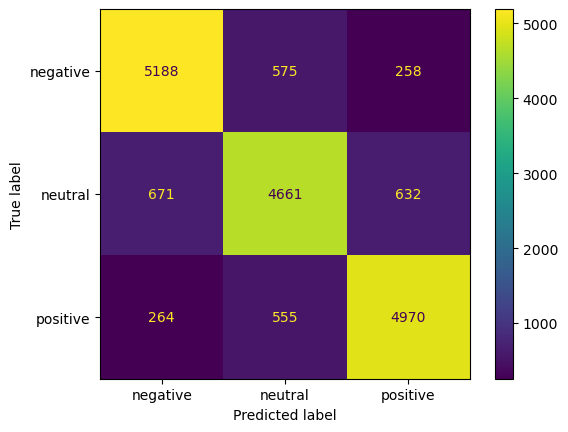

In [51]:
logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1_score = analyze_results(y_test,y_pred)

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
# Define a reduced parameter grid for Randomized Search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Initialize Multinomial Naive Bayes model
nb = MultinomialNB()

# Initialize RandomizedSearchCV
random_search_nb = RandomizedSearchCV(estimator=nb, param_distributions=param_grid,
                                       n_iter=10,  # Number of parameter settings to try
                                       cv=3,  # Using 3-fold cross-validation
                                       n_jobs=-1,  # Use all available cores
                                       verbose=2,  # More detailed output
                                       random_state=42)

# Time the training process
print("Training Naive Bayes model with hyperparameter tuning....")
t0 = time.time()

# Fit the model using the full dataset
random_search_nb.fit(XV_train, y_train)

train_time = time.time() - t0
print(f"Train time: {train_time:.3f}s")

# Get the best model and replace `nb`
nb = random_search_nb.best_estimator_

# Print the best hyperparameters and cross-validation score
print(f"Best Hyperparameters: {random_search_nb.best_params_}")
print(f"Best Cross-validation Score: {random_search_nb.best_score_}")

Training Naive Bayes model with hyperparameter tuning....
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train time: 4.704s
Best Hyperparameters: {'fit_prior': True, 'alpha': 0.1}
Best Cross-validation Score: 0.7930146952054699


In [54]:
# Predict on test set.
t0=time.time()
y_pred = nb.predict(XV_test)
predict_time = time.time()-t0
print(f"predict time: {predict_time:.3}s")

predict time: 0.0175s


Accuracy: 0.806796
Precision: 0.806347
Recall: 0.806796
F1 Score: 0.805555
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      6021
     neutral       0.80      0.72      0.76      5964
    positive       0.81      0.85      0.83      5789

    accuracy                           0.81     17774
   macro avg       0.81      0.81      0.81     17774
weighted avg       0.81      0.81      0.81     17774



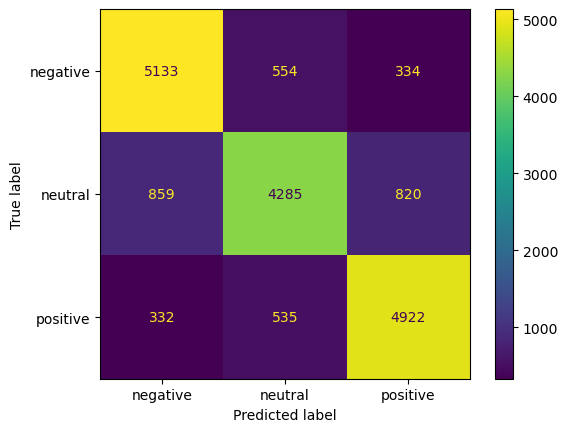

In [55]:
# Print results
naive_bayes_accuracy, naive_bayes_precision, naive_bayes_recall, naive_bayes_f1_score = analyze_results(y_test,y_pred)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Define a reduced parameter grid for Randomized Search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 5]  # Minimum number of samples required to be at a leaf node
}

# Initialize Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=0)

# Initialize RandomizedSearchCV
random_search_tree = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid,
                                         n_iter=10,  # Number of parameter settings to try
                                         cv=3,  # Using 3-fold cross-validation
                                         n_jobs=-1,  # Use all available cores
                                         verbose=2,  # More detailed output
                                         random_state=42)

# Time the training process
print("Training Decision Tree model with hyperparameter tuning....")
t0 = time.time()

# Fit the model using the full dataset
random_search_tree.fit(XV_train, y_train)

train_time = time.time() - t0
print(f"Train time: {train_time:.3f}s")

# Get the best model and replace `decision_tree`
decision_tree = random_search_tree.best_estimator_

# Print the best hyperparameters and cross-validation score
print(f"Best Hyperparameters: {random_search_tree.best_params_}")
print(f"Best Cross-validation Score: {random_search_tree.best_score_}")

Training Decision Tree model with hyperparameter tuning....
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train time: 497.629s
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Best Cross-validation Score: 0.6847606206715197


In [59]:
# Predict on test set.
t0=time.time()
y_pred = decision_tree.predict(XV_test)
predict_time = time.time()-t0
print(f"predict time: {predict_time:.3}s")

predict time: 0.039s


Accuracy: 0.711489
Precision: 0.712545
Recall: 0.711489
F1 Score: 0.710563
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.79      0.74      6021
     neutral       0.69      0.65      0.66      5964
    positive       0.75      0.70      0.73      5789

    accuracy                           0.71     17774
   macro avg       0.71      0.71      0.71     17774
weighted avg       0.71      0.71      0.71     17774



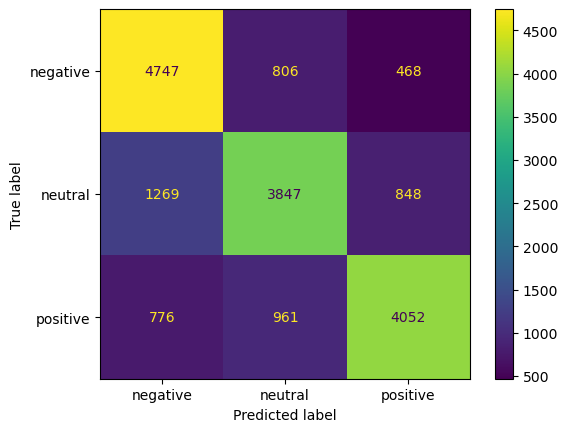

In [70]:
# Print results
decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1_score = analyze_results(y_test,y_pred)

In [71]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 1.0 MB/s eta 0:02:01
   ---------------------------------------- 0.6/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.2/124.9 MB 6.2 MB/s eta 0:00:20
    --------------------------------------- 1.9/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 2.7/124.9 MB 9.0 MB/s eta 0:00:14
   - -------------------------------------- 3.8/124.9 MB 11.0 MB/s eta 0:00:12
   - -------------------------------------- 5.1/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 6.1/124.9 MB 14.5 MB/s eta 0:00:09
   -- ------------------------------------- 7.5/124.9 MB 16.0 MB/s eta 0:00:08
   -- ------------------------------------- 8.4/124.9 MB 16.2 MB/s eta 0

In [90]:
import xgboost as xgb

In [74]:
from sklearn.preprocessing import LabelEncoder

In [77]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=0)

# Define a smaller hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],  # Fewer trees
    'max_depth': [3, 5],  # Shallower trees
    'learning_rate': [0.01, 0.1],  # Reduced learning rates
    'subsample': [0.7, 1.0],  # Sampling options
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to try (reduced for efficiency)
    scoring='accuracy',  # You can change this to 'f1', 'precision', etc.
    n_jobs=-1,  # Use all available cores
    cv=3,  # 3-fold cross-validation for faster execution
    random_state=0,
    verbose=1
)

# Time the training process
print("Training....")
t0 = time.time()

# Fit the RandomizedSearchCV model to the training data
random_search.fit(XV_train, y_train_encoded)

train_time = time.time() - t0
print(f"Train time: {train_time:.3f}s")

# Use the best model for predictions
XGB = random_search.best_estimator_

Training....
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train time: 375.102s


In [82]:
y_pred = XGB.predict(XV_test)

Accuracy: 0.624902
Precision: 0.644424
Recall: 0.624902
F1 Score: 0.627226
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      6021
           1       0.53      0.70      0.60      5964
           2       0.71      0.60      0.65      5789

    accuracy                           0.62     17774
   macro avg       0.64      0.62      0.63     17774
weighted avg       0.64      0.62      0.63     17774



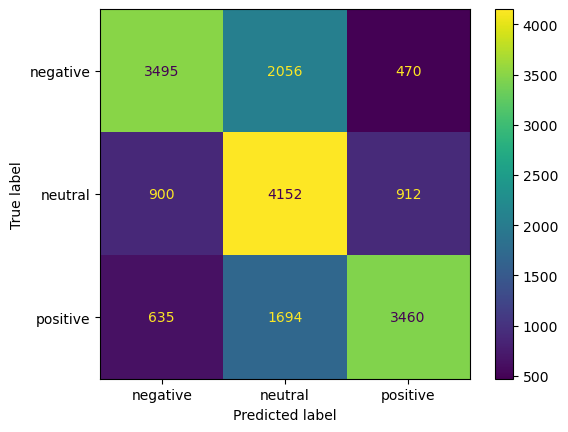

In [83]:
# Print results
y_test_encoded = label_encoder.transform(y_test)
xgboost_accuracy, xgboost_precision, xgboost_recall,xgboost_f1_score = analyze_results(y_test_encoded,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import time

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=0)

# Define a smaller hyperparameter space for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100],  # Fewer trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider at each split
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of parameter settings to try (reduced for efficiency)
    scoring='accuracy',  # Change this to 'f1', 'precision', etc., if needed
    n_jobs=-1,  # Use all available cores
    cv=3,  # 3-fold cross-validation for faster execution
    random_state=0,
    verbose=1
)

# Time the training process
print("Training....")
t0 = time.time()

# Fit the RandomizedSearchCV model to the training data
random_search_rf.fit(XV_train, y_train_encoded)

train_time = time.time() - t0
print(f"Train time: {train_time:.3f}s")

# Use the best model for predictions
RF = random_search_rf.best_estimator_  # Best Random Forest model
                                

Training....
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\palli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\palli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\palli\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\palli\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\palli\anaconda3\Lib\site-packages\

Train time: 1835.476s


In [85]:
# Predicting using the trained model
y_pred = RF.predict(XV_test)



Accuracy: 0.828682
Precision: 0.828487
Recall: 0.828682
F1 Score: 0.828533
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6021
           1       0.80      0.78      0.79      5964
           2       0.84      0.85      0.85      5789

    accuracy                           0.83     17774
   macro avg       0.83      0.83      0.83     17774
weighted avg       0.83      0.83      0.83     17774



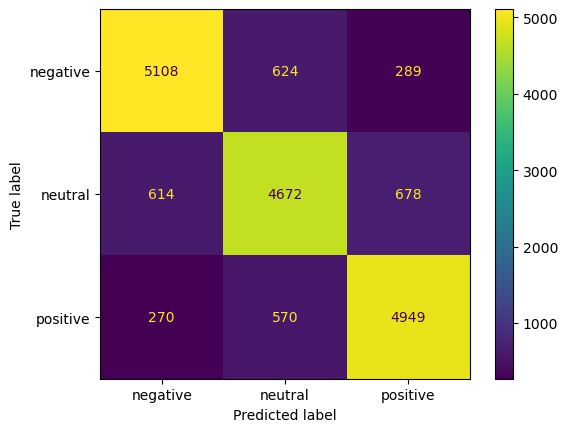

In [86]:
# Print results
# Use the already fitted label encoder to transform y_test
y_test_encoded = label_encoder.transform(y_test)  # Transform y_test only (not fit_transform)

# Analyze results (assuming analyze_results function is defined)
rf_accuracy, rf_precision, rf_recall, rf_f1_score = analyze_results(y_test_encoded, y_pred)

In [88]:
# Generate report
table = pd.DataFrame({'Model': ["Logistic Regression","Naive Bayes","Decision Tree", "Random Forest","XGBoost model"],
                        'F1':  [logistic_regression_f1_score, naive_bayes_f1_score, decision_tree_f1_score, rf_f1_score, xgboost_f1_score],
                        'Recall':  [logistic_regression_recall, naive_bayes_recall, decision_tree_recall, rf_recall, xgboost_recall],
                        'Precision': [logistic_regression_precision, naive_bayes_precision, decision_tree_precision, rf_precision, xgboost_precision],
                        'Accuracy': [logistic_regression_accuracy, naive_bayes_accuracy, decision_tree_accuracy, rf_accuracy, xgboost_accuracy],
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.833449,0.833746,0.833330,0.833746
1,Naive Bayes,0.805555,0.806796,0.806347,0.806796
2,Decision Tree,0.710563,0.711489,0.712545,0.711489
3,Random Forest,0.828533,0.828682,0.828487,0.828682
4,XGBoost model,0.627226,0.624902,0.644424,0.624902


In [ ]:
# Logistic Regression appears to be the better model based on all key metrics. It has a higher overall accuracy, precision, recall, and F1 score.
#for computational efficiency Logistic Regression is preferable as it's typically faster to train compared to Random Forest.
# Given these results, Logistic Regression would be the model to finalize.

In [89]:
# Export results to CSV
table.to_csv("Report_text_after_stematization.csv")

In [91]:
import pickle

# Save the model to a file
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved to {model_filename}")


Model saved to best_model.pkl


In [92]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
